<a href="https://colab.research.google.com/github/fufi-tuti/dataMiningprj/blob/main/K-Means%20Analysis%20and%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

df = pd.read_csv("final_selected_data.csv")


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [7]:
k_values = range(2, 7)
wcss = []
silhouette_scores = []
calinski_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(scaled_data, kmeans.labels_))

print("K-values:", list(k_values))
print("WCSS values:", wcss)
print("Silhouette Scores:", silhouette_scores)
print("Calinski-Harabasz Scores:", calinski_scores)

K-values: [2, 3, 4, 5, 6]
WCSS values: [43253.64113728645, 32648.540186466904, 20419.977755863652, 13998.439162240602, 8081.055899107501]
Silhouette Scores: [np.float64(0.489618013385644), np.float64(0.47351355306207377), np.float64(0.5971719597245527), np.float64(0.6542000975513658), np.float64(0.7298067394818004)]
Calinski-Harabasz Scores: [np.float64(26024.234123638398), np.float64(21765.44011133473), np.float64(28763.13378168776), np.float64(34663.72151808465), np.float64(52117.240228788585)]


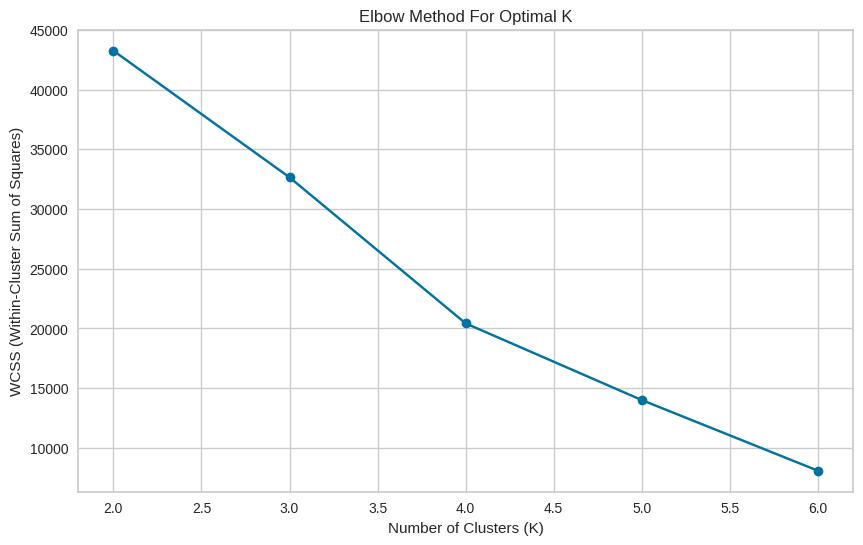

In [8]:
plt.figure(figsize=(10,6))
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

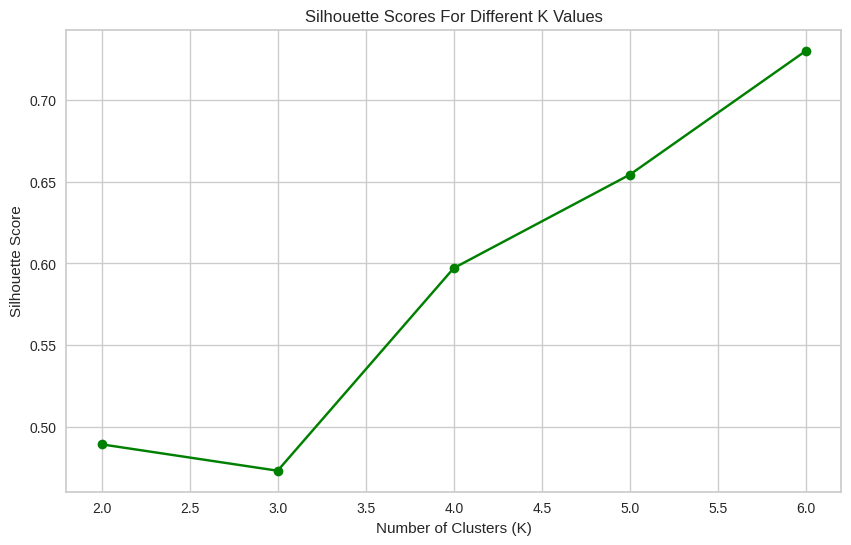

In [9]:
plt.figure(figsize=(10,6))
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Scores For Different K Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

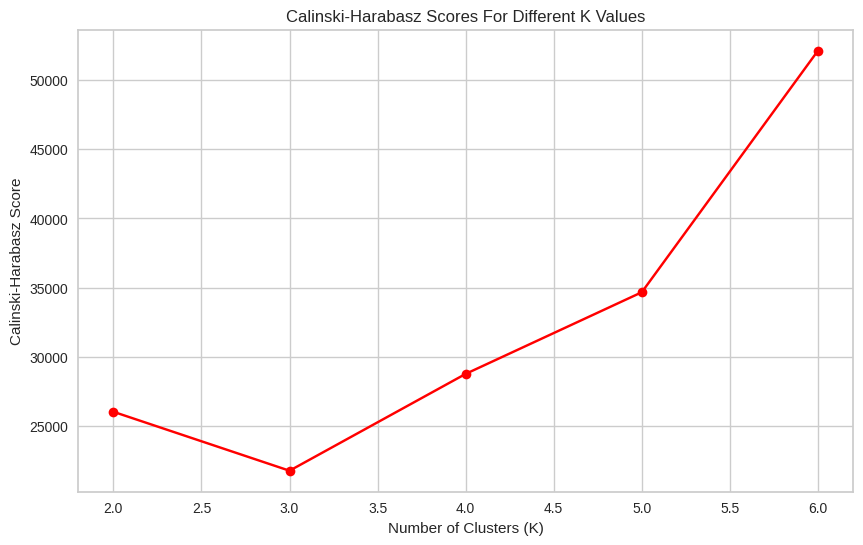

In [10]:
plt.figure(figsize=(10,6))
plt.plot(k_values, calinski_scores, marker='o', color='red')
plt.title("Calinski-Harabasz Scores For Different K Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

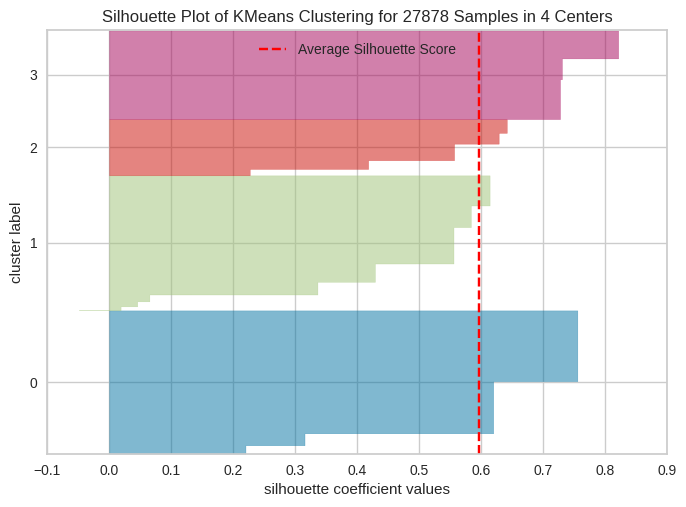

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 27878 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_data)
visualizer.show()

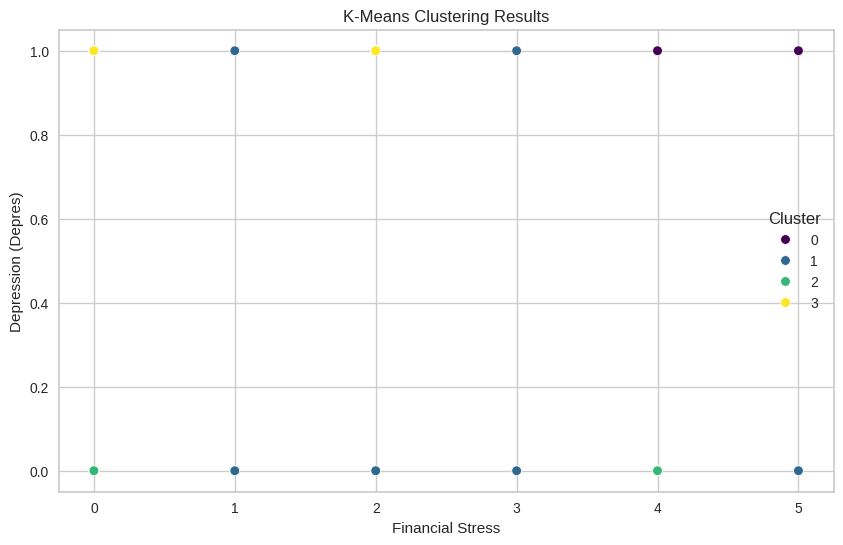

In [16]:
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Financial Stress'], y=df['Depression'], hue=df['Cluster'], palette='viridis')
plt.title("K-Means Clustering Results")
plt.xlabel("Financial Stress")
plt.ylabel("Depression (Depres)")
plt.legend(title='Cluster')
plt.show()